# Uber-Lyft Price Prediction
# Hasbi Thaufik Oktodila


Objective: 
- This project is an attempt to create a model from Uber-Lyft dataset to predict its price based on available data.
- This project is intended to be deployed as a usable predicting machine in order to predict the price before the user enter the vehicle 

# Importing Libraries

In [689]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings

# error and display settings
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', None)
warnings.filterwarnings(action='ignore')

# Data Loading

In [690]:
df = pd.read_csv('rideshare_kaggle.csv')
df.head(3)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000


In [691]:
df.shape

(693071, 57)

Dropping the unnecessary column such as:
- id, because it's just for indexing
- timestamp, unclear on what it represents
- datetime, since it's hard to calculate prediction from datetime category.

In [692]:
df.drop(['id', 'timestamp', 'datetime'],axis = 1, inplace=True)

In [693]:
df.head(3)

,hour,day,month,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,9,16,12,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,2,27,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,1,28,11,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000


# Exploratory Data Analysis

In [694]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   hour                         693071 non-null  int64  
 1   day                          693071 non-null  int64  
 2   month                        693071 non-null  int64  
 3   timezone                     693071 non-null  object 
 4   source                       693071 non-null  object 
 5   destination                  693071 non-null  object 
 6   cab_type                     693071 non-null  object 
 7   product_id                   693071 non-null  object 
 8   name                         693071 non-null  object 
 9   price                        637976 non-null  float64
 10  distance                     693071 non-null  float64
 11  surge_multiplier             693071 non-null  float64
 12  latitude                     693071 non-null  float64
 13 

Handling the null values, since we want to calculate mean of price of each categorical variables.

In [695]:
df.isnull().sum()

hour                               0
day                                0
month                              0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
visibility                         0
temperatureHigh                    0
temperatureHighTime                0
t

Null values only existed in price. Checking price skewness

In [696]:
print('Price Skewness Value: ', df['price'].skew())

Price Skewness Value:  1.0457470560899256


Checking price distribution

Skewness value:  1.1540326218538528


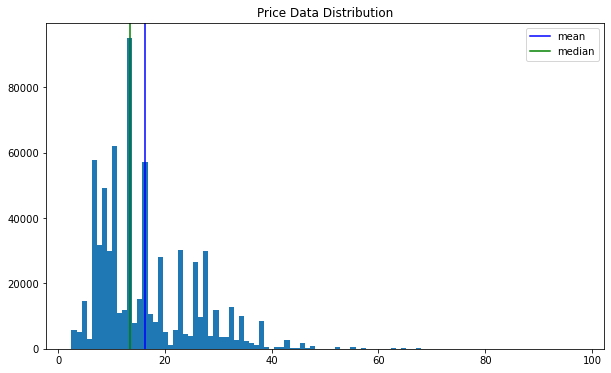

In [770]:
print('Skewness value: ', df['price'].skew())

fig, ax = plt.subplots(figsize=(10,6))
ax.hist(df['price'], bins=100)

ax.axvline(df['price'].mean(), color='blue', label='mean')
ax.axvline(df['price'].median(), color='green', label='median')

plt.legend()
plt.title("Price Data Distribution")
plt.show()

Filling the null values with median

In [698]:
df['price'].fillna(value=(df['price'].median()), inplace=True)

# Data Preprocessing

## Splitting for Model Inference

Since we handled the null values, 

In [699]:
df_inf = df.sample(10, random_state=42069)
df_inf

,hour,day,month,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
601134,4,1,12,America/New_York,North Station,Fenway,Lyft,lyft_luxsuv,Lux Black XL,32.5,3.14,1.0,42.3661,-71.0631,34.81,34.81,Mostly Cloudy,Mostly cloudy throughout the day.,0.0,0.0,0.77,2.98,2.98,1543554000,9.966,42.58,1543600800,31.55,1543658400,40.53,1543611600,27.95,1543658400,partly-cloudy-night,28.31,1018.55,305,0.86,0,9.966,290.6,1543578869,1543612472,0.79,0.0003,1543593600,28.68,1543575600,42.58,1543600800,27.26,1543568400,40.53,1543611600
250478,2,30,11,America/New_York,South Station,North Station,Lyft,lyft_lux,Lux Black,19.5,1.78,1.0,42.3661,-71.0631,37.11,31.86,Clear,Partly cloudy throughout the day.,0.0,0.0,0.67,6.68,8.53,1543514400,9.969,44.66,1543510800,28.68,1543575600,38.30,1543510800,27.26,1543568400,clear-night,27.27,1011.84,318,0.03,0,9.969,296.9,1543492404,1543526094,0.75,0.0000,1543510800,35.15,1543550400,44.66,1543510800,30.98,1543550400,38.30,1543510800
596699,0,18,12,America/New_York,Haymarket Square,Beacon Hill,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.5,0.91,1.0,42.3559,-71.0550,37.97,32.71,Partly Cloudy,Light rain in the morning.,0.0,0.0,0.70,6.96,11.55,1545022800,9.904,41.41,1545076800,23.95,1545138000,35.91,1545076800,11.84,1545134400,partly-cloudy-night,28.97,1001.23,292,0.47,0,9.904,378.9,1545048556,1545081259,0.33,0.0177,1545066000,34.18,1545044400,41.41,1545076800,28.19,1545044400,35.91,1545076800
277358,20,30,11,America/New_York,South Station,Beacon Hill,Lyft,lyft_luxsuv,Lux Black XL,32.5,2.57,1.0,42.3505,-71.1054,40.86,40.86,Overcast,Mostly cloudy throughout the day.,0.0,0.0,0.58,2.90,3.82,1543597200,9.888,42.05,1543600800,31.31,1543662000,41.38,1543600800,28.10,1543662000,cloudy,27.35,1016.60,290,1.00,0,9.888,276.5,1543578877,1543612485,0.79,0.0004,1543593600,28.42,1543579200,42.05,1543600800,29.07,1543579200,41.38,1543600800
24435,11,30,11,America/New_York,Northeastern University,Back Bay,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,13.5,1.34,1.0,42.3398,-71.0892,29.09,29.09,Clear,Mostly cloudy throughout the day.,0.0,0.0,0.86,2.53,3.48,1543554000,9.931,42.51,1543600800,31.26,1543658400,41.84,1543600800,27.76,1543658400,clear-night,25.41,1016.49,298,0.00,0,9.931,279.8,1543578871,1543612483,0.79,0.0005,1543593600,28.54,1543579200,42.51,1543600800,29.03,1543557600,41.84,1543600800
45708,17,15,12,America/New_York,Fenway,Financial District,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,21.5,4.40,1.0,42.3588,-71.0707,52.68,52.68,Mostly Cloudy,Mostly cloudy throughout the day.,0.0,0.0,0.75,3.61,5.62,1544918400,9.847,54.29,1544896800,39.01,1544954400,53.62,1544896800,35.18,1544954400,partly-cloudy-day,45.07,1020.72,321,0.54,1,9.847,299.7,1544875681,1544908429,0.27,0.0077,1544893200,39.80,1544929200,54.29,1544896800,36.78,1544929200,53.62,1544896800
148364,16,28,11,America/New_York,Haymarket Square,North Station,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,9.5,0.49,1.0,42.3661,-71.0631,41.16,35.84,Mostly Cloudy,Mostly cloudy throughout the day.,0.0,0.0,0.61,8.33,12.76,1543431600,10.000,42.60,1543438800,37.44,1543489200,36.58,1543438800,31.97,1543478400,partly-cloudy-day,28.91,991.41,297,0.81,1,10.000,352.0,1543405938,1543439718,0.72,0.0000,1543420800,33.75,1543399200,42.60,1543438800,29.97,1543399200,36.58,1543438800
231495,7,13,12,America/New_York,Fe

Removing inference from main dataframe

In [700]:
df = df.drop(df_inf.index)
df.head(3)

,hour,day,month,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,9,16,12,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,2,27,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,1,28,11,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000


## Exploring the Numerical Data for Feature Selection

In [701]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
dfnumerical = df[numerical_col]
dfnumerical.head(3)

,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,9,16,12,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,2,27,11,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,1,28,11,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000


checking the correlation between numerical data to price

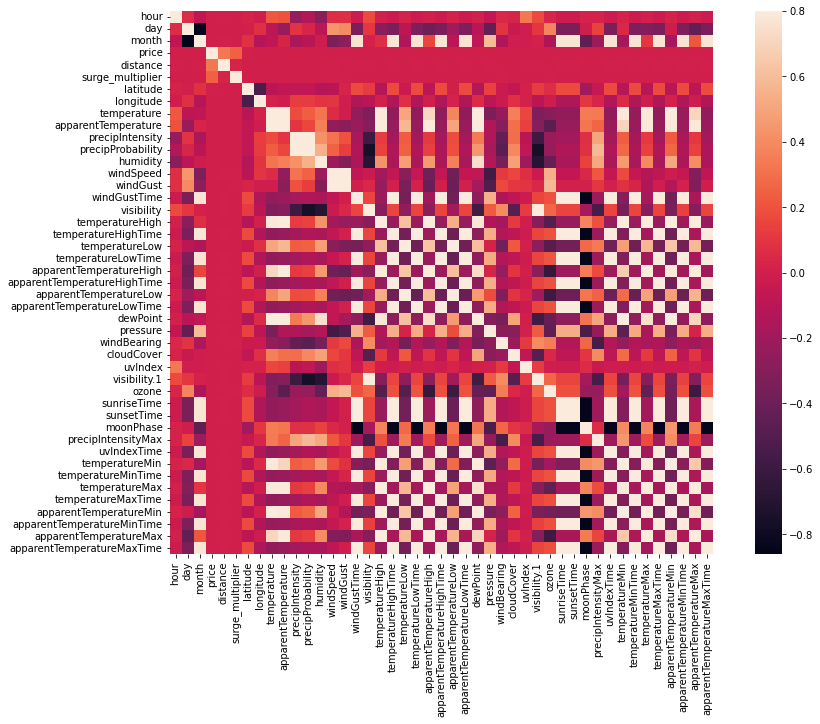

<Figure size 1080x720 with 0 Axes>

In [702]:
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(dfnumerical.corr(), vmax=.8, square=True);

plt.figure(figsize=(15,10))
plt.show()

There are only two column that has relevant correlation with the target column:
- distance
- surge multiplier
These two column will be included as feature

## Exploring the Categorical Data for Feature Selection

checking all categorical columns

In [703]:
category_col = df.select_dtypes(include=['object']).columns.tolist()
category_col

['timezone',
 'source',
 'destination',
 'cab_type',
 'product_id',
 'name',
 'short_summary',
 'long_summary',
 'icon']

Checking their infos

In [704]:
dfcategory = df[category_col]
dfcategory.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 693061 entries, 0 to 693070
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   timezone       693061 non-null  object
 1   source         693061 non-null  object
 2   destination    693061 non-null  object
 3   cab_type       693061 non-null  object
 4   product_id     693061 non-null  object
 5   name           693061 non-null  object
 6   short_summary  693061 non-null  object
 7   long_summary   693061 non-null  object
 8   icon           693061 non-null  object
dtypes: object(9)
memory usage: 52.9+ MB


Checking timezone's value

In [705]:
# checking the timezone values
df.timezone.unique()

array(['America/New_York'], dtype=object)

Timezone only has 1 value. This column will be dropped.

In [706]:
df.drop(['timezone'], axis=1, inplace=True)

checking source value in relation to price

In [707]:
df.groupby(['source'])['price'].mean().sort_values(ascending=False).to_frame().reset_index()

,source,price
0,Boston University,18.427489
1,Fenway,17.991334
2,Financial District,17.810724
3,Northeastern University,17.551274
4,Theatre District,16.349933
5,North Station,16.136074
6,West End,15.900858
7,Back Bay,15.845029
8,South Station,15.499377
9,Beacon Hill,15.492047


Checking destination's value in relation to price.

In [708]:
df.groupby(['destination'])['price'].mean().sort_values(ascending=False).to_frame().reset_index()


,destination,price
0,Boston University,18.509415
1,Fenway,17.776828
2,Financial District,17.686304
3,Northeastern University,17.483714
4,North Station,16.542431
5,Beacon Hill,16.029111
6,West End,16.008864
7,Back Bay,15.994903
8,Theatre District,15.777129
9,North End,14.882774


Checking cab_type value in relation to price.

In [709]:
df.groupby(['cab_type'])['price'].mean().sort_values(ascending=False).to_frame().reset_index()


,cab_type,price
0,Lyft,17.351306
1,Uber,15.467367


There's significant difference. This will be included as feature.

Checking product_id

In [710]:
df.groupby(['product_id'])['price'].mean().sort_values(ascending=False).to_frame().reset_index()


,product_id,price
0,lyft_luxsuv,32.324079
1,6d318bcc-22a3-4af6-bddd-b409bfce1546,30.286792
2,lyft_lux,23.062538
3,6c84fd89-3f11-4782-9b50-97c468b19529,20.523786
4,lyft_premier,17.771207
5,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,15.678150
6,lyft_plus,15.309363
7,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,13.500000
8,55c66225-fbe7-4fd5-9072-eab1ece5e23e,9.765074
9,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,9.765019


Checking name values

In [711]:
df.groupby(['name'])['price'].mean().sort_values(ascending=False).to_frame().reset_index()


,name,price
0,Lux Black XL,32.324079
1,Black SUV,30.286792
2,Lux Black,23.062538
3,Black,20.523786
4,Lux,17.771207
5,UberXL,15.678150
6,Lyft XL,15.309363
7,Taxi,13.500000
8,UberX,9.765074
9,WAV,9.765019


The average price of each value has significant difference. The 'name' and 'product_id' column have a same amount. it seems that 'name' represents to 'product_id' since they both have exact average price. Since 'name' is easier to understand, 'product_id' will be dropped, and 'name' will be considered as feature. product_id will immediately dropped.

In [712]:
df.drop(['product_id'], axis=1, inplace=True)
df.head(3)

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000


comparing short_summary to price

In [713]:
df.groupby(['short_summary'])['price'].mean().sort_values(ascending=False).to_frame().reset_index()


,short_summary,price
0,Mostly Cloudy,16.348668
1,Light Rain,16.314649
2,Partly Cloudy,16.312097
3,Overcast,16.292865
4,Rain,16.292424
5,Foggy,16.283113
6,Drizzle,16.266859
7,Clear,16.250793
8,Possible Drizzle,16.247819


This column represents weather. Since there's no significant difference, this column will be dropped.

In [714]:
df.drop(['short_summary'], axis=1, inplace=True)

comparing long_summary to price

In [715]:
df.groupby(['long_summary'])['price'].mean().sort_values(ascending=False).to_frame().reset_index()


,long_summary,price
0,Rain in the morning and afternoon.,16.643849
1,Light rain in the morning and overnight.,16.341831
2,Rain throughout the day.,16.336124
3,Light rain in the morning.,16.325013
4,Partly cloudy throughout the day.,16.321477
5,"Rain until morning, starting again in the eve...",16.285462
6,Mostly cloudy throughout the day.,16.279601
7,Foggy in the morning.,16.278880
8,Light rain until evening.,16.259489
9,Overcast throughout the day.,16.247596


This column has no significant difference between each values in relation to price. This column will be dropped.

In [716]:
df.drop(['long_summary'], axis=1, inplace=True)

comparing icon to price

In [717]:
df.groupby(['icon'])['price'].mean().sort_values(ascending=False).to_frame().reset_index()


,icon,price
0,partly-cloudy-night,16.334088
1,partly-cloudy-day,16.328317
2,rain,16.294362
3,cloudy,16.292865
4,fog,16.283113
5,clear-day,16.272231
6,clear-night,16.241252


This column also represent weather, but there's no significant changes to price between its values. This column will be dropped.

In [718]:
df.drop(['icon'], axis=1, inplace=True)

This column is also represent weather but less-detailed. The average price of each values seems to have a slight difference. This column might be the one that is relevant to become one of the feature since it's not a 'summary' of a day

It looks like short-summary, long-summary, and icon has a same behavior. From the average price of each column's values, it seems that there's a slight difference between values. But in this case, I believe there's at least a slight amount of correlation between weather and price. So to pick one, I will pick 'long_summary' for a feature because it has more significant different price average on each value.

In [719]:
df.groupby(['hour'])['price'].mean().sort_values(ascending=False).to_frame().reset_index()


,hour,price
0,17,16.371639
1,21,16.359958
2,8,16.355572
3,22,16.348977
4,20,16.348419
5,4,16.339070
6,0,16.333380
7,2,16.323058
8,19,16.314822
9,11,16.313185


'hour' seems doesn't have significant difference on each values. There's only 0.1 difference between the highest and the lowest average. This column might be dropped.

In [720]:
df.drop(['hour'], axis=1, inplace=True)

comparing day in relation to price

In [721]:
df.groupby(['day'])['price'].mean().sort_values(ascending=False).to_frame().reset_index()


,day,price
0,9,16.510454
1,4,16.401709
2,27,16.347116
3,13,16.345885
4,16,16.341502
5,1,16.330312
6,18,16.325946
7,29,16.321739
8,14,16.315780
9,15,16.315556


There's no significant difference on each hour. This will be dropped.

In [722]:
df.drop(['day'], axis=1, inplace=True)

comparing month in relation to price

In [723]:
df.groupby(['month'])['price'].mean().sort_values(ascending=False).to_frame().reset_index()

,month,price
0,12,16.308871
1,11,16.294611


Since the unique value of month is only 2, and both doesn't have significant difference, this column will be dropped. Therefore for the time-based category, 'day' will become one of the feature.

In [724]:
df.drop(['month'], axis=1, inplace=True)

For summary, based on the analysis above the chosen features are:
- source
- destination
- cab_type
- name
- distance
- surge multiplier

Slicing the features:

In [725]:
df_clean = df[['source', 'destination', 'cab_type', 'name', 'distance', 'surge_multiplier', 'price']]
df_clean.head(3)

,source,destination,cab_type,name,distance,surge_multiplier,price
0,Haymarket Square,North Station,Lyft,Shared,0.44,1.0,5.0
1,Haymarket Square,North Station,Lyft,Lux,0.44,1.0,11.0
2,Haymarket Square,North Station,Lyft,Lyft,0.44,1.0,7.0


## Splitting Train - Test and X - Y

In [727]:
dfx = df_clean.drop(['price'], axis = 1)
dfy = df_clean['price']

In [728]:
from sklearn.model_selection import train_test_split

dfx_train, dfx_test, dfy_train, dfy_test = train_test_split(dfx, dfy, test_size=0.2, random_state=17)

print('Train Size : ', dfx_train.shape)
print('Test Size  : ', dfx_test.shape)
print('Target Train Size :', dfy_train.shape)
print('Target Test Size :', dfy_test.shape)

Train Size :  (554448, 6)
Test Size  :  (138613, 6)
Target Train Size : (554448,)
Target Test Size : (138613,)


## Handling Train's Outlier

Pre-analysis:
- Even though 'day', 'hour', and 'surge multiplier' has int/float data type, this column will be treated as categorical since its behavior is different compared to regular numerical values. So, the only numerical data is 'distance'

Importing winsorizer library

In [729]:
from feature_engine.outliers import Winsorizer

Chekcing distance's skewness

In [730]:
dfx_train.distance.skew()

0.834188621852413

Chcking distance data distribution

Skewness value:  0.834188621852413


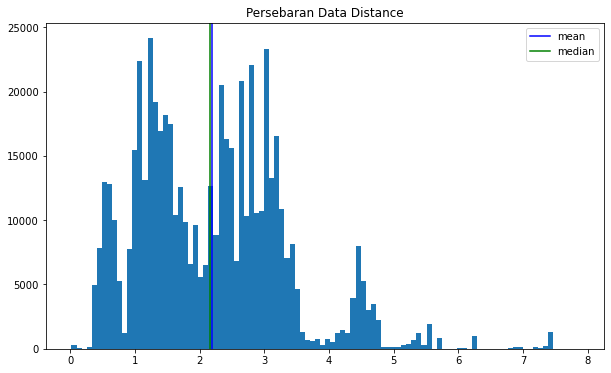

In [731]:
print('Skewness value: ', dfx_train['distance'].skew())

fig, ax = plt.subplots(figsize=(10,6))
ax.hist(dfx_train['distance'], bins=100)

ax.axvline(dfx_train['distance'].mean(), color='blue', label='mean')
ax.axvline(dfx_train['distance'].median(), color='green', label='median')

plt.legend()
plt.title("Persebaran Data Distance")
plt.show()

Using winsorizer to cap the outlier. Using iqr since the distribution is slightly riight-skewed

In [732]:
wins = Winsorizer(capping_method='iqr', tail='both', fold=3, variables=['distance'])

dfx_train_clean = wins.fit_transform(dfx_train)

checking the train data info before outlier handling

In [733]:
print('before handling: \n', dfx_train['distance'].describe())

before handling: 
 count    554448.000000
mean          2.189022
std           1.139095
min           0.020000
25%           1.280000
50%           2.160000
75%           2.920000
max           7.860000
Name: distance, dtype: float64


checking the train data info after outlier handling

In [734]:
print('after handling: \n', dfx_train_clean['distance'].describe())

after handling: 
 count    554448.000000
mean          2.189022
std           1.139094
min           0.020000
25%           1.280000
50%           2.160000
75%           2.920000
max           7.840000
Name: distance, dtype: float64


Checking the skewness and distance data ditribution

Skewness value:  0.8341793342188258


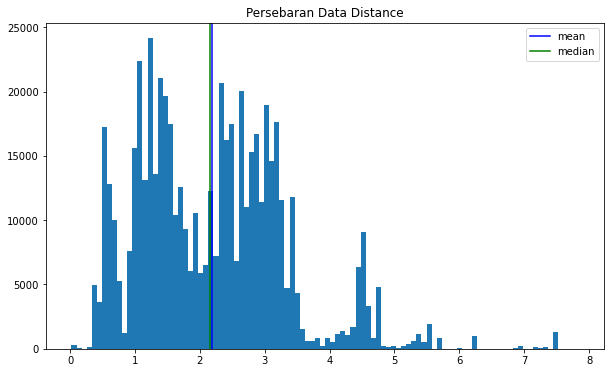

In [735]:
print('Skewness value: ', dfx_train_clean['distance'].skew())

fig, ax = plt.subplots(figsize=(10,6))
ax.hist(dfx_train_clean['distance'], bins=100)

ax.axvline(dfx_train_clean['distance'].mean(), color='blue', label='mean')
ax.axvline(dfx_train_clean['distance'].median(), color='green', label='median')

plt.legend()
plt.title("Persebaran Data Distance")
plt.show()

## Feature Scaling

### Splitting the numericals and categoricals

Pre-analysis:
- Even though 'day', 'hour', and 'surge multiplier' has int/float data type, this column will be treated as categorical since its behavior is different compared to regular numerical values. So, the only numerical data is 'distance'

To do that, we will change the data type of 'day', 'hour', and 'surge_multiplier' as object to ease the encoding and scaling process.

In [736]:
dfx_train_clean['surge_multiplier'] = dfx_train_clean['surge_multiplier'].astype(str)

checking the infos

In [737]:
dfx_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 554448 entries, 190506 to 589049
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   source            554448 non-null  object 
 1   destination       554448 non-null  object 
 2   cab_type          554448 non-null  object 
 3   name              554448 non-null  object 
 4   distance          554448 non-null  float64
 5   surge_multiplier  554448 non-null  object 
dtypes: float64(1), object(5)
memory usage: 29.6+ MB


dividing numerical and categorical values in both train and test dataset

In [738]:
xnum_columns = dfx_train_clean.select_dtypes(include=np.number).columns.tolist()
xcat_columns = dfx_train_clean.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', xnum_columns)
print('Categorical Columns : ', xcat_columns)

Numerical Columns :  ['distance']
Categorical Columns :  ['source', 'destination', 'cab_type', 'name', 'surge_multiplier']


convert them to dataframe

In [739]:
dfx_train_num = dfx_train[xnum_columns]
dfx_train_cat = dfx_train[xcat_columns]

dfx_test_num = dfx_test[xnum_columns]
dfx_test_cat = dfx_test[xcat_columns]

In [740]:
dfx_train_num.head(5)

,distance
190506,3.01
119151,2.87
603658,2.41
269191,3.32
632634,2.88


scaling numerical values with minmax scaler

In [741]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(dfx_train_num)

dfx_train_num_scaled = scaler.transform(dfx_train_num)
dfx_test_num_scaled = scaler.transform(dfx_test_num)

dfx_train_num_scaled

array([[0.38137755],
       [0.36352041],
       [0.30484694],
       ...,
       [0.12882653],
       [0.09693878],
       [0.24872449]])

## Feature Encoding

In [742]:
dfx_train_cat.head(5)

,source,destination,cab_type,name,surge_multiplier
190506,Back Bay,North End,Lyft,Lyft XL,1.0
119151,West End,Boston University,Lyft,Lux Black,1.0
603658,Beacon Hill,Northeastern University,Lyft,Lux Black XL,1.0
269191,North Station,Northeastern University,Lyft,Shared,1.0
632634,South Station,West End,Uber,WAV,1.0


encoding the categorical values

In [743]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
encoder.fit(dfx_train_cat)

dfx_train_cat_encoded = encoder.transform(dfx_train_cat)
dfx_test_cat_encoded = encoder.transform(dfx_test_cat)

dfx_train_cat_encoded

array([[ 0.,  6.,  0.,  6.,  0.],
       [11.,  2.,  0.,  3.,  0.],
       [ 1.,  8.,  0.,  4.,  0.],
       ...,
       [ 5.,  4.,  0.,  3.,  0.],
       [11.,  5.,  0.,  2.,  0.],
       [ 1.,  8.,  1.,  9.,  0.]])

## Concating the Numericals and Categoricals

combining numerical and categorical both train and test dataset

In [744]:
dfx_train_final = np.concatenate([dfx_train_num_scaled, dfx_train_cat_encoded], axis=1)
dfx_test_final = np.concatenate([dfx_test_num_scaled, dfx_test_cat_encoded], axis=1)

dfx_train_final

array([[ 0.38137755,  0.        ,  6.        ,  0.        ,  6.        ,
         0.        ],
       [ 0.36352041, 11.        ,  2.        ,  0.        ,  3.        ,
         0.        ],
       [ 0.30484694,  1.        ,  8.        ,  0.        ,  4.        ,
         0.        ],
       ...,
       [ 0.12882653,  5.        ,  4.        ,  0.        ,  3.        ,
         0.        ],
       [ 0.09693878, 11.        ,  5.        ,  0.        ,  2.        ,
         0.        ],
       [ 0.24872449,  1.        ,  8.        ,  1.        ,  9.        ,
         0.        ]])

convert it to dataframe

In [745]:
dfx_train_final_df = pd.DataFrame(dfx_train_final, columns=[xnum_columns + xcat_columns])
dfx_train_final_df.head(5)

,distance,source,destination,cab_type,name,surge_multiplier
0,0.381378,0.0,6.0,0.0,6.0,0.0
1,0.363520,11.0,2.0,0.0,3.0,0.0
2,0.304847,1.0,8.0,0.0,4.0,0.0
3,0.420918,7.0,8.0,0.0,7.0,0.0
4,0.364796,9.0,11.0,1.0,12.0,0.0


checking the shape to make sure

In [746]:
print(dfx_train_final_df.shape)
print(dfy_train.shape)

(554448, 6)
(554448,)


# Model Definition

define linear regression as model

In [747]:
from sklearn.linear_model import LinearRegression 
model_lin_reg = LinearRegression()

fitting with linear regression

In [748]:
model_lin_reg.fit(dfx_train_final, dfy_train)

LinearRegression()

# Model Evaluation

Evaluasi menggunakan MAE dan R2 Score

predicting both train and test

In [749]:
dfy_pred_train = model_lin_reg.predict(dfx_train_final)
dfy_pred_test = model_lin_reg.predict(dfx_test_final)

dfy_pred_train

array([16.41787449, 20.83494309, 17.89924704, ..., 15.92985002,
       16.98021875, 12.22339465])

evaluating with MAE and R2 Score

In [769]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

print('MAE train score : ', mean_absolute_error(dfy_train, dfy_pred_train))
print('MAE test score  : ', mean_absolute_error(dfy_test, dfy_pred_test))

print('\nMSE Train Score :', mean_squared_error(dfy_train, dfy_pred_train))
print('MSE Test Score  :', mean_squared_error(dfy_test, dfy_pred_test))

print('\nRMSE Train Score :', np.sqrt(mean_squared_error(dfy_train, dfy_pred_train)))
print('RMSE Test Score  :', np.sqrt(mean_squared_error(dfy_test, dfy_pred_test)))

print('\nR2 Score        : ', r2_score(dfy_train, dfy_pred_train))
print('R2 Score        : ', r2_score(dfy_test, dfy_pred_test))

MAE train score :  4.923177493628474
MAE test score  :  4.926013307167179

MSE Train Score : 39.813411781030524
MSE Test Score  : 39.75594036045446

RMSE Train Score : 6.309786983807815
RMSE Test Score  : 6.305231190087676

R2 Score        :  0.5067824473077598
R2 Score        :  0.5071415374489134


The difference between MAE and RMSE score is about 1.3xx, so in relation to price, it is not that big. However, to me personally, the score 4.9 is still huge relative to the price. This model needs to be reevaluated and improved to produce significant prediction.

# Inferencing

Applying model to inference

In [751]:
df_inf

,hour,day,month,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
601134,4,1,12,America/New_York,North Station,Fenway,Lyft,lyft_luxsuv,Lux Black XL,32.5,3.14,1.0,42.3661,-71.0631,34.81,34.81,Mostly Cloudy,Mostly cloudy throughout the day.,0.0,0.0,0.77,2.98,2.98,1543554000,9.966,42.58,1543600800,31.55,1543658400,40.53,1543611600,27.95,1543658400,partly-cloudy-night,28.31,1018.55,305,0.86,0,9.966,290.6,1543578869,1543612472,0.79,0.0003,1543593600,28.68,1543575600,42.58,1543600800,27.26,1543568400,40.53,1543611600
250478,2,30,11,America/New_York,South Station,North Station,Lyft,lyft_lux,Lux Black,19.5,1.78,1.0,42.3661,-71.0631,37.11,31.86,Clear,Partly cloudy throughout the day.,0.0,0.0,0.67,6.68,8.53,1543514400,9.969,44.66,1543510800,28.68,1543575600,38.30,1543510800,27.26,1543568400,clear-night,27.27,1011.84,318,0.03,0,9.969,296.9,1543492404,1543526094,0.75,0.0000,1543510800,35.15,1543550400,44.66,1543510800,30.98,1543550400,38.30,1543510800
596699,0,18,12,America/New_York,Haymarket Square,Beacon Hill,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.5,0.91,1.0,42.3559,-71.0550,37.97,32.71,Partly Cloudy,Light rain in the morning.,0.0,0.0,0.70,6.96,11.55,1545022800,9.904,41.41,1545076800,23.95,1545138000,35.91,1545076800,11.84,1545134400,partly-cloudy-night,28.97,1001.23,292,0.47,0,9.904,378.9,1545048556,1545081259,0.33,0.0177,1545066000,34.18,1545044400,41.41,1545076800,28.19,1545044400,35.91,1545076800
277358,20,30,11,America/New_York,South Station,Beacon Hill,Lyft,lyft_luxsuv,Lux Black XL,32.5,2.57,1.0,42.3505,-71.1054,40.86,40.86,Overcast,Mostly cloudy throughout the day.,0.0,0.0,0.58,2.90,3.82,1543597200,9.888,42.05,1543600800,31.31,1543662000,41.38,1543600800,28.10,1543662000,cloudy,27.35,1016.60,290,1.00,0,9.888,276.5,1543578877,1543612485,0.79,0.0004,1543593600,28.42,1543579200,42.05,1543600800,29.07,1543579200,41.38,1543600800
24435,11,30,11,America/New_York,Northeastern University,Back Bay,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,13.5,1.34,1.0,42.3398,-71.0892,29.09,29.09,Clear,Mostly cloudy throughout the day.,0.0,0.0,0.86,2.53,3.48,1543554000,9.931,42.51,1543600800,31.26,1543658400,41.84,1543600800,27.76,1543658400,clear-night,25.41,1016.49,298,0.00,0,9.931,279.8,1543578871,1543612483,0.79,0.0005,1543593600,28.54,1543579200,42.51,1543600800,29.03,1543557600,41.84,1543600800
45708,17,15,12,America/New_York,Fenway,Financial District,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,21.5,4.40,1.0,42.3588,-71.0707,52.68,52.68,Mostly Cloudy,Mostly cloudy throughout the day.,0.0,0.0,0.75,3.61,5.62,1544918400,9.847,54.29,1544896800,39.01,1544954400,53.62,1544896800,35.18,1544954400,partly-cloudy-day,45.07,1020.72,321,0.54,1,9.847,299.7,1544875681,1544908429,0.27,0.0077,1544893200,39.80,1544929200,54.29,1544896800,36.78,1544929200,53.62,1544896800
148364,16,28,11,America/New_York,Haymarket Square,North Station,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,9.5,0.49,1.0,42.3661,-71.0631,41.16,35.84,Mostly Cloudy,Mostly cloudy throughout the day.,0.0,0.0,0.61,8.33,12.76,1543431600,10.000,42.60,1543438800,37.44,1543489200,36.58,1543438800,31.97,1543478400,partly-cloudy-day,28.91,991.41,297,0.81,1,10.000,352.0,1543405938,1543439718,0.72,0.0000,1543420800,33.75,1543399200,42.60,1543438800,29.97,1543399200,36.58,1543438800
231495,7,13,12,America/New_York,Fe

converting surge_multiplier to string

In [752]:
df_inf['surge_multiplier'] = df_inf['surge_multiplier'].astype(str)

In [753]:
df_inf_num = df_inf[xnum_columns]
df_inf_cat = df_inf[xcat_columns]

df_inf_num.head(10)

,distance
601134,3.14
250478,1.78
596699,0.91
277358,2.57
24435,1.34
45708,4.40
148364,0.49
231495,2.46
461501,3.31
45964,2.32


scaling with minmax

In [754]:
scaler = MinMaxScaler()
scaler.fit(df_inf_num)

df_inf_num_scaled = scaler.transform(df_inf_num)

df_inf_num_scaled

array([[0.67774936],
       [0.32992327],
       [0.10741688],
       [0.53196931],
       [0.2173913 ],
       [1.        ],
       [0.        ],
       [0.50383632],
       [0.72122762],
       [0.46803069]])

## Inference Feature Encoding

Showing the categorical values

In [755]:
df_inf_cat

,source,destination,cab_type,name,surge_multiplier
601134,North Station,Fenway,Lyft,Lux Black XL,1.0
250478,South Station,North Station,Lyft,Lux Black,1.0
596699,Haymarket Square,Beacon Hill,Uber,Black SUV,1.0
277358,South Station,Beacon Hill,Lyft,Lux Black XL,1.0
24435,Northeastern University,Back Bay,Uber,Taxi,1.0
45708,Fenway,Financial District,Uber,UberXL,1.0
148364,Haymarket Square,North Station,Uber,UberXL,1.0
231495,Fenway,Beacon Hill,Uber,Black SUV,1.0
461501,North Station,Northeastern University,Lyft,Lyft,1.0
45964,South Station,North Station,Lyft,Lux,1.0


encoding the categorical column

In [756]:

encoder = OrdinalEncoder()
encoder.fit(df_inf_cat)

df_inf_cat_encoded = encoder.transform(df_inf_cat)

df_inf_cat_encoded

array([[2., 2., 0., 3., 0.],
       [4., 4., 0., 2., 0.],
       [1., 1., 1., 0., 0.],
       [4., 1., 0., 3., 0.],
       [3., 0., 1., 5., 0.],
       [0., 3., 1., 6., 0.],
       [1., 4., 1., 6., 0.],
       [0., 1., 1., 0., 0.],
       [2., 5., 0., 4., 0.],
       [4., 4., 0., 1., 0.]])

combining scaled and encoded categorical and numerical column

In [757]:
df_inf_final = np.concatenate([df_inf_num_scaled, df_inf_cat_encoded], axis=1)

df_inf_final

array([[0.67774936, 2.        , 2.        , 0.        , 3.        ,
        0.        ],
       [0.32992327, 4.        , 4.        , 0.        , 2.        ,
        0.        ],
       [0.10741688, 1.        , 1.        , 1.        , 0.        ,
        0.        ],
       [0.53196931, 4.        , 1.        , 0.        , 3.        ,
        0.        ],
       [0.2173913 , 3.        , 0.        , 1.        , 5.        ,
        0.        ],
       [1.        , 0.        , 3.        , 1.        , 6.        ,
        0.        ],
       [0.        , 1.        , 4.        , 1.        , 6.        ,
        0.        ],
       [0.50383632, 0.        , 1.        , 1.        , 0.        ,
        0.        ],
       [0.72122762, 2.        , 5.        , 0.        , 4.        ,
        0.        ],
       [0.46803069, 4.        , 4.        , 0.        , 1.        ,
        0.        ]])

showing the final dataframe

In [758]:
df_inf_final_df = pd.DataFrame(df_inf_final, columns=[xnum_columns + xcat_columns])
df_inf_final_df

,distance,source,destination,cab_type,name,surge_multiplier
0,0.677749,2.0,2.0,0.0,3.0,0.0
1,0.329923,4.0,4.0,0.0,2.0,0.0
2,0.107417,1.0,1.0,1.0,0.0,0.0
3,0.531969,4.0,1.0,0.0,3.0,0.0
4,0.217391,3.0,0.0,1.0,5.0,0.0
5,1.000000,0.0,3.0,1.0,6.0,0.0
6,0.000000,1.0,4.0,1.0,6.0,0.0
7,0.503836,0.0,1.0,1.0,0.0,0.0
8,0.721228,2.0,5.0,0.0,4.0,0.0
9,0.468031,4.0,4.0,0.0,1.0,0.0


Printing the shape to make sure it has the same shape for comparison later

In [759]:
print(df_inf_final_df.shape)
print(df_inf.shape)

(10, 6)
(10, 54)


## Inference Modeling

In [760]:
print(df_inf_final_df.shape)
print(df_inf.shape)

(10, 6)
(10, 54)


Predicting the price

In [761]:
y_pred_inf = model_lin_reg.predict(df_inf_final_df)
y_pred_inf

array([26.86814636, 21.43265303, 22.6704819 , 23.98739105, 17.51698656,
       31.72816944, 11.62750862, 30.62289176, 26.2893449 , 25.69956552])

Comparing the prediction

In [762]:
df_inf['price_prediction'] = y_pred_inf
compare = df_inf[['source', 'destination', 'cab_type', 'name', 'distance', 'surge_multiplier', 'price', 'price_prediction']]
compare

,source,destination,cab_type,name,distance,surge_multiplier,price,price_prediction
601134,North Station,Fenway,Lyft,Lux Black XL,3.14,1.0,32.5,26.868146
250478,South Station,North Station,Lyft,Lux Black,1.78,1.0,19.5,21.432653
596699,Haymarket Square,Beacon Hill,Uber,Black SUV,0.91,1.0,27.5,22.670482
277358,South Station,Beacon Hill,Lyft,Lux Black XL,2.57,1.0,32.5,23.987391
24435,Northeastern University,Back Bay,Uber,Taxi,1.34,1.0,13.5,17.516987
45708,Fenway,Financial District,Uber,UberXL,4.40,1.0,21.5,31.728169
148364,Haymarket Square,North Station,Uber,UberXL,0.49,1.0,9.5,11.627509
231495,Fenway,Beacon Hill,Uber,Black SUV,2.46,1.0,31.5,30.622892
461501,North Station,Northeastern University,Lyft,Lyft,3.31,1.0,10.5,26.289345
45964,South Station,North Station,Lyft,Lux,2.32,1.0,19.5,25.699566


# Kesimpulan

In [771]:
intercept = model_lin_reg.intercept_
slope = model_lin_reg.coef_

print('Intercept : ', intercept)
print('Slope : ', slope)

Intercept :  17.58441282196577
Slope :  [ 2.01437096e+01  3.29481676e-02  1.01006226e-02  2.87924585e+00
 -1.48491679e+00  5.26864781e+00]


Dari sini didapatkan intercept (y saat x=0) bernilai 17.5844. Jadi, saat feature-feature bernilai 0, model ini mengasumsikan harga yang didapatkan adalah 17.5844.

# Questions:

- Sebutkan dan jelaskan asumsi yang dipakai oleh Linear Regression!

To find similarities, Linear Regression draws a line that is passed by the distribution of data the most. If new data comes in, this model pulls the data around the line and uses it as a reference. This line will be referenced during the prediction process. The smaller the difference between the predicted value and the initial value in determining the success of Linear Regression, the better the line drawn. In this task, for example, distance (distance) as x will be taken as the line with the most data passed, and that line will be forwarded and used as a price prediction reference (y). If new distance data is entered, the data will use the reference line to predict the price (y)

- Tunjukkan dan tafsirkan arti dari coefficient dan slope yang didapat dari model yang telah Anda bangun !

The obtained data show that the value of y when x = 0 is 17.5844. This is the start of the prediction line. Meanwhile, the coefficient data obtained is

[ 2.01437096e+01 3.29481676e-02 1.01006226e-02 2.87924585e+00
-1.48491679e+00 5.26864781e+00].

The linear regression coefficient indicates whether each independent variable and the dependent variable have a positive or negative correlation. The positive coefficient indicates that as the independent variable increases in value, so does the average dependent variable. When the coefficient is negative, it means that as an independent variable rises, the dependent variable tends to fall. The six values listed above represent the coefficient values for each feature.

